#IMPORT LIBRARIES

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import joblib
import random



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


#LOAD DATA

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data file
data = pd.read_csv('/content/gdrive/MyDrive/AIA/STUDIO/Spreadsheets/Compiled Dataset.csv')
pd.options.display.max_columns = None

print(data)

     Unnamed: 0 POA_CODE_2021  Walk Score  Transit Score  Third Places  \
0          3000       POA3000         100            100           763   
1          3002       POA3002          88            100            33   
2          3003       POA3003          16             53             8   
3          3004       POA3004          64             96            48   
4          3006       POA3006          97            100            66   
..          ...           ...         ...            ...           ...   
233        3930       POA3930          33             36            20   
234        3931       POA3931          44             34            22   
235        3975       POA3975           9             32             1   
236        3976       POA3976          37             42            19   
237        3977       POA3977           4             15            42   

     CafesRestaurantsBistros  Area _sqkm  Density_third_places  \
0                     6652.0      2.4814     

In [ ]:

# Assuming your dataframe is named 'df'
column_names = data.columns.tolist()
print(column_names)

['Unnamed: 0', 'POA_CODE_2021', 'Walk Score', 'Transit Score', 'Third Places', 'CafesRestaurantsBistros', 'Area _sqkm', 'Density_third_places', 'Sum_Distance_third_places (Km)', 'Average_distance_third_places (km)', 'Average Distance (m)', 'Standard Deviation:', 'Coefficient of Variation:', 'Indigenous_P_Tot_P', 'Tot_P_M', 'Tot_P_F', 'Tot_P_P', 'age_0_4', 'Age_5_14_yr', 'Age_15_19_yr', 'Age_20_24_yr', 'Age_25_34_yr', 'Age_35_44_yr', 'Age_45_54_yr', 'Age_55_64_yr', 'Age_65_74_yr', 'Age_75_84_yr', 'Age_85ov', 'Indigenous Population Percentage_x', 'Male Population Percentage', 'Female Population Percentage', 'Median_age_persons', 'Median_mortgage_repay_monthly', 'Median_tot_prsnl_inc_weekly', 'Median_rent_weekly', 'Median_tot_fam_inc_weekly', 'Average_num_psns_per_bedroom', 'Median_tot_hhd_inc_weekly', 'Average_household_size', 'P_Tot_Tot', 'Married Percentage', 'Separated Percentage', 'Divorced Percentage', 'Widowed Percentage', 'Never_married Percentage', 'Tot_Indig_status_ns_P', 'Tot_T

In [ ]:
print(data.info())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Columns: 115 entries, Unnamed: 0 to DidNotGoToSchool_y
dtypes: float64(89), int64(25), object(1)
memory usage: 214.0+ KB
None


Now we remove the columns that are redundant

In [ ]:
data = data.drop(['Indigenous Population Percentage_x', 'Male Population Percentage', 'Female Population Percentage', 'P_Tot_Tot', 'Tot_Tot_P', 'Tot_Tot', 'F_Tot_Tot', 'Tot_P_y', 'Tot_P_x'], axis=1)
#print(data.info())


We remove column 4 first (it is not close to complete...) then we remove some postcodes from our study due to missing info in dataset

In [ ]:
data=data.drop('CafesRestaurantsBistros', axis=1)
#print(data.info())

In [ ]:
data=data.dropna()
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 237
Columns: 105 entries, Unnamed: 0 to DidNotGoToSchool_y
dtypes: float64(85), int64(19), object(1)
memory usage: 195.4+ KB
None


#GET LONELINESS CONTRIBUTORS

In [ ]:
lonely_factors = data.loc[:, ['POA_CODE_2021', 'Walk Score','Transit Score','Third Places','Tot_P_M','Tot_P_F','Tot_P_P','age_0_4','Age_5_14_yr',
                      'Age_15_19_yr','Age_20_24_yr','Age_25_34_yr','Age_35_44_yr',
                      'Age_45_54_yr','Age_55_64_yr','Age_65_74_yr','Age_85ov','Median_age_persons','Married Percentage',
                      'Never_married Percentage','Separated Percentage','Divorced Percentage','Widowed Percentage','Percent_Unem_loyment_P','Area _sqkm','Density_third_places']]

In [ ]:
#create new dataframe with loneliness contributor

# Create a new empty dataframe with the same length as lonely_factors
lonely_factor_scores = lonely_factors.reindex(columns=[])

lonely_factor_scores

""
0
1
2
3
4
...
233
234
235
236


In [ ]:
print(lonely_factors.describe())

       Walk Score  Transit Score  Third Places       Tot_P_M       Tot_P_F  \
count  236.000000     236.000000    236.000000    236.000000    236.000000   
mean    46.389831      41.555085     23.902542   9572.033898   9872.474576   
std     32.395307      26.274515     54.765370   9352.036421   9369.768875   
min      0.000000       0.000000      0.000000     35.000000     30.000000   
25%     16.000000      26.000000      4.000000   4075.500000   4195.500000   
50%     51.000000      44.000000     12.000000   7952.500000   8273.500000   
75%     76.000000      59.000000     29.000000  11980.500000  12709.750000   
max    100.000000     100.000000    763.000000  66596.000000  63291.000000   

             Tot_P_P     age_0_4  Age_5_14_yr  Age_15_19_yr  Age_20_24_yr  \
count     236.000000  236.000000   236.000000    236.000000    236.000000   
mean    19444.588983    5.360678    11.697881      5.681822      6.524153   
std     18713.106518    1.734028     3.013297      1.630378      2

In [ ]:
lonely_factor_scores['Walk Score']=lonely_factors['Walk Score']
lonely_factor_scores['Transit Score']=lonely_factors['Transit Score']
lonely_factor_scores['Density_third_places']=lonely_factors['Density_third_places']

In [ ]:
lonely_factor_scores['population_density']=lonely_factors['Tot_P_P']/lonely_factors['Area _sqkm']

In [ ]:
lonely_factor_scores['Third_Places_PerPers']=lonely_factors['Third Places']/lonely_factors['Tot_P_P']

Note that densities are calculated / sqkm

In [ ]:
#Combine widowed, divorced separated since they tend to be more lonely than married and never married
lonely_factor_scores['marital_lonely']=lonely_factors['Separated Percentage']+lonely_factors['Widowed Percentage']+lonely_factors['Divorced Percentage']

In [ ]:
lonely_factor_scores['Median Age']=lonely_factors['Median_age_persons']

In [ ]:
lonely_factor_scores['Unemployment']=lonely_factors['Percent_Unem_loyment_P']

#higher unemployment = more lonely

In [ ]:
#Get GINI Coefficient (to calculate the diversity of some parameters)
#intraditional gini calculation:
# 0 represents perfect income equality (everyone has the same income)
# 1 represents perfect income inequality (one individual has all the income)

#define function to calculate Gini coefficient
def get_gini(x):
  total = 0
  for i, xi in enumerate(x[:-1], 1):
      total += np.sum(np.abs(xi - x[i:]))
  return total / (len(x)**2 * np.mean(x))

In [ ]:
#now for age groups..
ginis = []
for index, row in lonely_factors.iterrows():
  tot_p = row['Tot_P_P']
  tot_p_f = (row['Tot_P_F']/tot_p)*100
  tot_p_m = (row['Tot_P_M']/tot_p)*100
  my_list = [tot_p_f, tot_p_m]
  #print(my_list)
  gini=get_gini(np.array(my_list))
  ginis.append(gini)

lonely_factor_scores['M_F_Ginis']=ginis

In [ ]:
#start by getting gini for male and female population... in this case lower gini = equality = diversity
ginis = []
for index, row in lonely_factors.iterrows():

    age_0_4 = row['age_0_4']
    Age_5_14_yr = row['Age_5_14_yr']
    Age_15_19_yr = row['Age_15_19_yr']
    Age_20_24_yr = row['Age_20_24_yr']
    Age_25_34_yr = row['Age_25_34_yr']
    Age_35_44_yr = row['Age_35_44_yr']
    Age_45_54_yr = row['Age_45_54_yr']
    Age_55_64_yr = row['Age_55_64_yr']
    Age_65_74_yr = row['Age_65_74_yr']
    Age_85ov = row['Age_85ov']

    my_list = [age_0_4, Age_5_14_yr,Age_15_19_yr,Age_20_24_yr,Age_25_34_yr,Age_35_44_yr,Age_45_54_yr,Age_55_64_yr,Age_55_64_yr,Age_65_74_yr,Age_85ov]
    #print(my_list)
    gini=get_gini(np.array(my_list))
    ginis.append(gini)

lonely_factor_scores['Age_Ginis']=ginis

In [ ]:
lonely_factor_scores

,Walk Score,Transit Score,Density_third_places,population_density,Third_Places_PerPers,marital_lonely,Median Age,Unemployment,M_F_Ginis,Age_Ginis
0,100,100,307.487709,17362.779076,0.017710,6.83,28,9.6,0.000104,0.600893
1,88,100,17.783047,2638.357493,0.006740,15.21,42,3.2,0.019600,0.380450
2,16,53,1.215399,1219.197229,0.000997,8.77,31,6.3,0.010413,0.528567
3,64,96,11.875015,2840.602657,0.004180,15.37,37,4.8,0.007490,0.422376
4,97,100,35.594866,12241.937224,0.002908,9.55,31,5.8,0.006653,0.546152
...,...,...,...,...,...,...,...,...,...,...
233,33,36,0.861783,807.232082,0.001068,14.31,45,3.3,0.013932,0.274322
234,44,34,1.043010,1221.222408,0.000854,23.89,50,3.8,0.035699,0.220924
235,9,32,0.074721,1348.566476,0.000055,10.57,33,5.6,0.000194,0.307242
236,37,42,1.424042,1954.835373,0.000728,14.61,33,8.1,0.010465,0.241578


now we want to give scores from 0 to 1 per category... 0 being less lonely and 1 being more lonely... we remap the values based on how they contribute.... and finally we evaluate loneliness from 0 to 10 (10 being the maximum loneliness because we have 10 factors)

To do so we will use the two functions below to either remap to 0 to 1 or inverse remap values from 1 to 0

In [ ]:
# function  to remap values to  target domain of 0 to 1
# we will use it multiple times below

def remap_values(values):
    min_val = min(values)
    max_val = max(values)
    remapped_values = []

    for value in values:
      if max_val!=min_val:
        remapped_value = (value - min_val) / (max_val - min_val)
        remapped_values.append(remapped_value)
      else:
        remapped_value = 0
        remapped_values.append(remapped_value)


    return remapped_values

In [ ]:
def remap_values_inverse(values):
    min_val = min(values)
    max_val = max(values)
    remapped_values = []

    for value in values:
        if max_val != min_val:
            remapped_value = 1 - ((value - min_val) / (max_val - min_val))
            remapped_values.append(remapped_value)
        else:
            remapped_value = 0
            remapped_values.append(remapped_value)

    return remapped_values


In [ ]:
scores=list(lonely_factor_scores['Walk Score'])
remapped_scores=remap_values_inverse(scores)

lonely_factor_scores['Walk Score']=remapped_scores

In [ ]:
scores=list(lonely_factor_scores['Transit Score'])
remapped_scores=remap_values_inverse(scores)

lonely_factor_scores['Transit Score']=remapped_scores

In [ ]:
scores=list(lonely_factor_scores['Density_third_places'])
remapped_scores=remap_values_inverse(scores)

lonely_factor_scores['Density_third_places']=remapped_scores

In [ ]:
scores=list(lonely_factor_scores['population_density'])
remapped_scores=remap_values_inverse(scores)

lonely_factor_scores['population_density']=remapped_scores

In [ ]:
scores=list(lonely_factor_scores['Third_Places_PerPers'])
remapped_scores=remap_values_inverse(scores)

lonely_factor_scores['Third_Places_PerPers']=remapped_scores

In [ ]:
#Median age... lower ages tend to be more lonely according to some research in australia... so higher age = less lonely
scores=list(lonely_factor_scores['Median Age'])
remapped_scores=remap_values_inverse(scores)

lonely_factor_scores['Median Age']=remapped_scores

In [ ]:
#important!!! only run this cell once otherwise it will remap the wrong values:)
scores=list(lonely_factor_scores['marital_lonely'])
scores.append(100)
remapped_scores=remap_values(scores)
remapped_scores.pop()

lonely_factor_scores['marital_lonely']=remapped_scores

In [ ]:
#important!!! only run this cell once otherwise it will remap the wrong values:)
scores=list(lonely_factor_scores['Unemployment'])
scores.append(100)
remapped_scores=remap_values(scores)
remapped_scores.pop()

lonely_factor_scores['Unemployment']=remapped_scores

In [ ]:
#and finally... the GINIs no need to remap those since their range is already between 0 and 1... but to double check all values:
for colname, col in lonely_factor_scores.items():
  print(colname)
  print("//min_val", col.min(), "//max_val", col.max())
  print()

Walk Score
//min_val 0.0 //max_val 1.0

Transit Score
//min_val 0.0 //max_val 1.0

Density_third_places
//min_val 0.0 //max_val 1.0

population_density
//min_val 0.0 //max_val 1.0

Third_Places_PerPers
//min_val 0.0 //max_val 1.0

marital_lonely
//min_val 0.0 //max_val 0.1975957926371149

Median Age
//min_val 0.0 //max_val 1.0

Unemployment
//min_val 0.0 //max_val 0.11009174311926605

M_F_Ginis
//min_val 0.0 //max_val 0.04494082524789419

Age_Ginis
//min_val 0.185411562432839 //max_val 0.6008931481269434



#CLASSIFY POSTCODES ACCORDING TO LONELINESS

FIRST WE DEFINE THE LONELINESS FORMULA

In [ ]:
#our parameters are all in:

lonely_factor_scores

,Walk Score,Transit Score,Density_third_places,population_density,Third_Places_PerPers,marital_lonely,Median Age,Unemployment,M_F_Ginis,Age_Ginis
0,0.00,0.00,0.000000,0.000000,0.796340,0.000000,0.939394,0.078491,0.000104,0.600893
1,0.12,0.00,0.942167,0.848216,0.922488,0.089943,0.515152,0.013252,0.019600,0.380450
2,0.84,0.47,0.996047,0.929968,0.988536,0.020822,0.848485,0.044852,0.010413,0.528567
3,0.36,0.04,0.961381,0.836565,0.951925,0.091660,0.666667,0.029562,0.007490,0.422376
4,0.03,0.00,0.884240,0.294991,0.966562,0.029194,0.848485,0.039755,0.006653,0.546152
...,...,...,...,...,...,...,...,...,...,...
233,0.67,0.64,0.997197,0.953699,0.987723,0.080283,0.424242,0.014271,0.013932,0.274322
234,0.56,0.66,0.996608,0.929851,0.990178,0.183106,0.272727,0.019368,0.035699,0.220924
235,0.91,0.68,0.999757,0.922515,0.999363,0.040142,0.787879,0.037717,0.000194,0.307242
236,0.63,0.58,0.995369,0.887591,0.991623,0.083503,0.787879,0.063201,0.010465,0.241578


In [ ]:
#our recipe (with weights)

def loneliness(walk_score,transit_score,third_place_density,pop_density,third_place_pp,marital_lonely,median_age,unemployment,M_F_Gini,Age_Gini):
  return (walk_score*15)+(transit_score*10)+(third_place_density*10)+(pop_density*10)+(third_place_pp*10)+(marital_lonely*5)+(median_age*5)+(unemployment*10)+(M_F_Gini*10)+(Age_Gini*15)

In [ ]:
#if all inputs score 1 on the loneliness scale we get an amount of 100% loneliness
print(loneliness(1,1,1,1,1,1,1,1,1,1))
#and if all inputs score 0... we get 0% loneliness
print(loneliness(0,0,0,0,0,0,0,0,0,0))

#so our loneliness factor lies somewhere between 0 and 100%

100
0


In [ ]:
loneliness_list=[]
for index, row in lonely_factor_scores.iterrows():
    # Access row data
    walk_score=row['Walk Score']
    transit_score=row['Transit Score']
    third_place_density=row['Density_third_places']
    pop_density=row['population_density']
    third_place_pp=row['Third_Places_PerPers']
    marital_lonely=row['marital_lonely']
    median_age=row['Median Age']
    unemployment=row['Unemployment']
    M_F_Gini=row['M_F_Ginis']
    Age_Gini=row['Age_Ginis']
    x=loneliness(walk_score,transit_score,third_place_density,pop_density,third_place_pp,marital_lonely,median_age,unemployment,M_F_Gini,Age_Gini)
    loneliness_list.append(x)

lonely_factor_scores['loneliness']=loneliness_list

In [ ]:
lonely_factor_scores

,Walk Score,Transit Score,Density_third_places,population_density,Third_Places_PerPers,marital_lonely,Median Age,Unemployment,M_F_Ginis,Age_Ginis,loneliness
0,0.00,0.00,0.000000,0.000000,0.796340,0.000000,0.939394,0.078491,0.000104,0.600893,22.459722
1,0.12,0.00,0.942167,0.848216,0.922488,0.089943,0.515152,0.013252,0.019600,0.380450,37.989438
2,0.84,0.47,0.996047,0.929968,0.988536,0.020822,0.848485,0.044852,0.010413,0.528567,59.273202
3,0.36,0.04,0.961381,0.836565,0.951925,0.091660,0.666667,0.029562,0.007490,0.422376,43.796499
4,0.03,0.00,0.884240,0.294991,0.966562,0.029194,0.848485,0.039755,0.006653,0.546152,34.952700
...,...,...,...,...,...,...,...,...,...,...,...
233,0.67,0.64,0.997197,0.953699,0.987723,0.080283,0.424242,0.014271,0.013932,0.274322,52.755684
234,0.56,0.66,0.996608,0.929851,0.990178,0.183106,0.272727,0.019368,0.035699,0.220924,50.310069
235,0.91,0.68,0.999757,0.922515,0.999363,0.040142,0.787879,0.037717,0.000194,0.307242,58.794197
236,0.63,0.58,0.995369,0.887591,0.991623,0.083503,0.787879,0.063201,0.010465,0.241578,52.713057


In [ ]:
data['avg_dist/area(km)']=data['Average_distance_third_places (km)']/data['Area _sqkm']


In [ ]:
#now we want to go back to our original dataframe and plug the loneliness factor in there...
data['loneliness']=loneliness_list
data

,Unnamed: 0,POA_CODE_2021,Walk Score,Transit Score,Third Places,Area _sqkm,Density_third_places,Sum_Distance_third_places (Km),Average_distance_third_places (km),Average Distance (m),Standard Deviation:,Coefficient of Variation:,Indigenous_P_Tot_P,Tot_P_M,Tot_P_F,Tot_P_P,age_0_4,Age_5_14_yr,Age_15_19_yr,Age_20_24_yr,Age_25_34_yr,Age_35_44_yr,Age_45_54_yr,Age_55_64_yr,Age_65_74_yr,Age_75_84_yr,Age_85ov,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Married Percentage,Separated Percentage,Divorced Percentage,Widowed Percentage,Never_married Percentage,Tot_Indig_status_ns_P,Indigenous Population Percentage_y,Buddhism Percentage,Christianity_Tot Percentage,Hinduism Percentage,Islam Percentage,Judaism Percentage,Othr_Rel_Sikhism Percentage,Othr_Rel_Aust_Abor_Trad_Rel Percentage,Arthritis Percentage,Asthma Percentage,Cancer Percentage,Dementia Percentage,Diabetes Percentage,Heart_disease Percentage,Kidney_disease Percentage,Lung_cond Percentage,Mental_health_cond Percentage,Stroke Percentage,Other Percentage,None Percentage,Couple Family Without Children,Couple Family With Children,One Parent Family,Other Family,Total_dwelings,0_MVs,1_MVs,2_MVs,3_MVs,>4_MVs,Total_PDs_Dwellings,OPDs_Separate_house_Dwellings_Percentage,OPDs_SD_r_t_h_th_Tot_Dwgs_Percentage,OPDs_Flt_apart_Tot_Dwgs_Percentage,OPDs_Oth_dwg_Cvn_Ds_Percentage,OPDs_Oth_dwg_cab_hboat_Ds_Percentage,OPDs_Ot_dwg_Hs_f_att_sh_of_Ds_Percentage,OPDs_Other_dwelling_Tot_Dwgs_Percentage,Percent_Unem_loyment_P,Percnt_LabForc_prticipation_P,Percnt_Employment_to_populn_P,Managers Percentage,Professionals Percentage,TechnicTrades_W Percentage,CommunPersnlSvc_W Percentage,ClericalAdminis_W Percentage,Sales_W Percentage,Mach_oper_drivers Percentage,Labourers Percentage,Occu_ID_NS Percentage,Did_not_work,Worked_home,3_methods_to_reach_work,2_methods_to_reach_work,1_methods_to_reach_work,Other_Educational_Institution_y,Total_Tertiary_y,Tertiary_University_y,Tertiary_Vocational_y,Secondary_y,Primary_y,Grade_12Complete_y,Grade_10Complete_y,DidNotGoToSchool_y,avg_dist/area(km),loneliness
0,3000,POA3000,100,100,763,2.4814,307.487709,354934.491900,0.723323,517,260,0.502,158,21548,21539,43084,1.62,1.78,4.01,25.13,41.00,13.72,5.72,3.92,2.22,0.75,0.17,28,1733,768,370,1857,1.1,1306,1.7,18.76,1.72,4.42,0.69,74.42,3825,8.878006,10.54,19.78,7.47,2.63,0.17,0.43,0.00,1.54,4.68,0.72,0.08,1.23,0.72,0.25,0.24,6.37,0.21,4.26,74.34,69.15,13.10,7.65,10.12,21750,70.22,24.76,2.43,0.24,0.20,32013,0.02,0.15,67.34,0.00,0.00,0.03,0.03,9.6,68.8,62.2,8.88,31.61,6.84,19.85,12.62,9.75,1.12,7.44,1.88,13.57,31.82,1.21,4.62,48.34,8.57,66.01,49.61,16.34,2.10,2.26,81.91,81.91,0.77,0.291498,22.459722
1,3002,POA3002,88,100,33,1.8557,17.783047,697.393232,0.660410,495,140,0.283,12,2353,2545,4896,2.25,3.59,1.88,5.62,23.37,16.05,11.27,13.54,13.30,6.62,2.43,42,2383,1532,480,3733,0.9,2345,1.8,35.97,2.56,8.90,3.75,49.01,260,5.310458,1.49,36.32,0.76,0.98,0.61,0.06,0.00,7.70,7.68,3.92,1.06,2.35,3.62,0.84,0.88,9.35,0.82,8.62,59.66,71.56,19.35,7.01,2.67,2396,18.86,52.71,22.50,2.96,1.84,3255,2.37,16.53,54.13,0.00,0.00,0.09,0.09,3.2,69.0,66.8,18.20,48.03,2.23,7.82,15.64,4.47,0.59,1.45,1.77,9.58,48.77,0.23,1.14,39.93,4.24,44.92,37.61,7.01,9.77,11.06,81.87,81.87,0.20,0.355882,37.989438
2,3003,POA3003,16,53,8,6.5822,1.215399,28.100876,0.501801,344,100,0.293,69,4093,3926,8025,3.12,4.19,2.83,13.68,40.47,17.16,8.69,5.42,3.05,1.13,0.19,31,2106,1058,388,2406,1.1,1788,1.9,26.57,2.47,5.43,0.87,64.56,372,4.635514,5.16,22.28,5.84,2.98,0.30,0.25,0.00,2.21,6.55,1.13,0.09,1.56,1.31,0.45,0.35,8.46,0.22,6.09,70.01,64.34,23.43,8.39,3.90,3853,35.89,50.43,10.41,1.43,0.49,4968,0.93,14.45,61.71,0.00,0.00,0.42,0.42,6.3,75.5,70.7,13.06,38.32,5.49,13.46,14.09,7.02,0.99,5.68,1.54,11.44,38.41,0.91,3.34,45.50,7.90,55.34,40.45,14.68,6.96,7.51,82.32,82.32,0.52,0.076236,59.273202
3,3004,POA3004,64,96,48,4.0421,11.875015,22

In [ ]:
data['loneliness'].describe()

count    236.000000
mean      50.359853
std        8.160969
min       22.459722
25%       44.033856
50%       49.259850
75%       56.978234
max       65.875610
Name: loneliness, dtype: float64

#SPLIT DATASET INTO LONELY AND NOT LONELY ZONES

In [ ]:
columns = data.columns
# postcodes_lonely=pd.DataFrame(columns=columns)
# postcodes_not_lonely=pd.DataFrame(columns=columns)

#loneliness threshold to classify lonely vs not lonely postcodes
threshold=55
pc_lonely=[]
pc_not_lonely=[]
for index, row in data.iterrows():
    # Access row data using row[column_name]
    if row['loneliness']>threshold:
      pc_lonely.append(row)
    else:
      pc_not_lonely.append(row)

postcodes_lonely=pd.DataFrame(pc_lonely)
postcodes_not_lonely=pd.DataFrame(pc_not_lonely)

print(len(data))
print(len(postcodes_lonely))
print(len(postcodes_not_lonely))

236
75
161


In [ ]:
postcodes_not_lonely=postcodes_not_lonely.reset_index(drop=True)

In [ ]:
postcodes_lonely=postcodes_lonely.reset_index(drop=True)

# DECLARE STARTING FEATURES(BASED ON THE LESS LONELY POSTCODES) *from pairplots*

In [ ]:
# Keep only numerical data
data_numerical = postcodes_not_lonely.iloc[:, 2:].copy()
data_numerical=pd.DataFrame(data_numerical)

In [ ]:
column_names = data_numerical.columns.tolist()
print(column_names)

['Walk Score', 'Transit Score', 'Third Places', 'Area _sqkm', 'Density_third_places', 'Sum_Distance_third_places (Km)', 'Average_distance_third_places (km)', 'Average Distance (m)', 'Standard Deviation:', 'Coefficient of Variation:', 'Indigenous_P_Tot_P', 'Tot_P_M', 'Tot_P_F', 'Tot_P_P', 'age_0_4', 'Age_5_14_yr', 'Age_15_19_yr', 'Age_20_24_yr', 'Age_25_34_yr', 'Age_35_44_yr', 'Age_45_54_yr', 'Age_55_64_yr', 'Age_65_74_yr', 'Age_75_84_yr', 'Age_85ov', 'Median_age_persons', 'Median_mortgage_repay_monthly', 'Median_tot_prsnl_inc_weekly', 'Median_rent_weekly', 'Median_tot_fam_inc_weekly', 'Average_num_psns_per_bedroom', 'Median_tot_hhd_inc_weekly', 'Average_household_size', 'Married Percentage', 'Separated Percentage', 'Divorced Percentage', 'Widowed Percentage', 'Never_married Percentage', 'Tot_Indig_status_ns_P', 'Indigenous Population Percentage_y', 'Buddhism Percentage', 'Christianity_Tot Percentage', 'Hinduism Percentage', 'Islam Percentage', 'Judaism Percentage', 'Othr_Rel_Sikhism Pe

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

In [ ]:
#Declare features

selected_col=['Age_20_24_yr', 'Age_25_34_yr', 'Age_35_44_yr','Age_85ov','0_MVs', '1_MVs','2_MVs', '3_MVs', '>4_MVs','Median_age_persons','OPDs_Separate_house_Dwellings_Percentage','OPDs_Flt_apart_Tot_Dwgs_Percentage','Median_tot_prsnl_inc_weekly','Managers Percentage', 'Professionals Percentage']
x=data_numerical[selected_col]

#PCA (DERIVE RELEVANT FEATURES)

In [ ]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA(3)

In [ ]:
# Fit the model
model.fit(x)

PCA(n_components=3)

In [ ]:
# Fit and transform the data
data_reduced = model.transform(x)
data_num_reduced_df = pd.DataFrame(data_reduced)

print(data_num_reduced_df)

##this data frame has my new features

              0           1          2
0   -148.715568  110.300654  39.181695
1    610.513395    9.720420   1.098644
2    424.020252   45.364781   6.583663
3    252.691443   68.164979  20.878844
4    263.750886   66.520861  23.043931
..          ...         ...        ...
156  -74.030899  -29.901480   6.411182
157  -60.804241  -26.656852   5.708682
158   36.474555  -44.058587   9.469234
159 -186.381805   -0.797208  -5.472309
160 -260.620270  -11.838029  10.155452

[161 rows x 3 columns]


<Axes: >

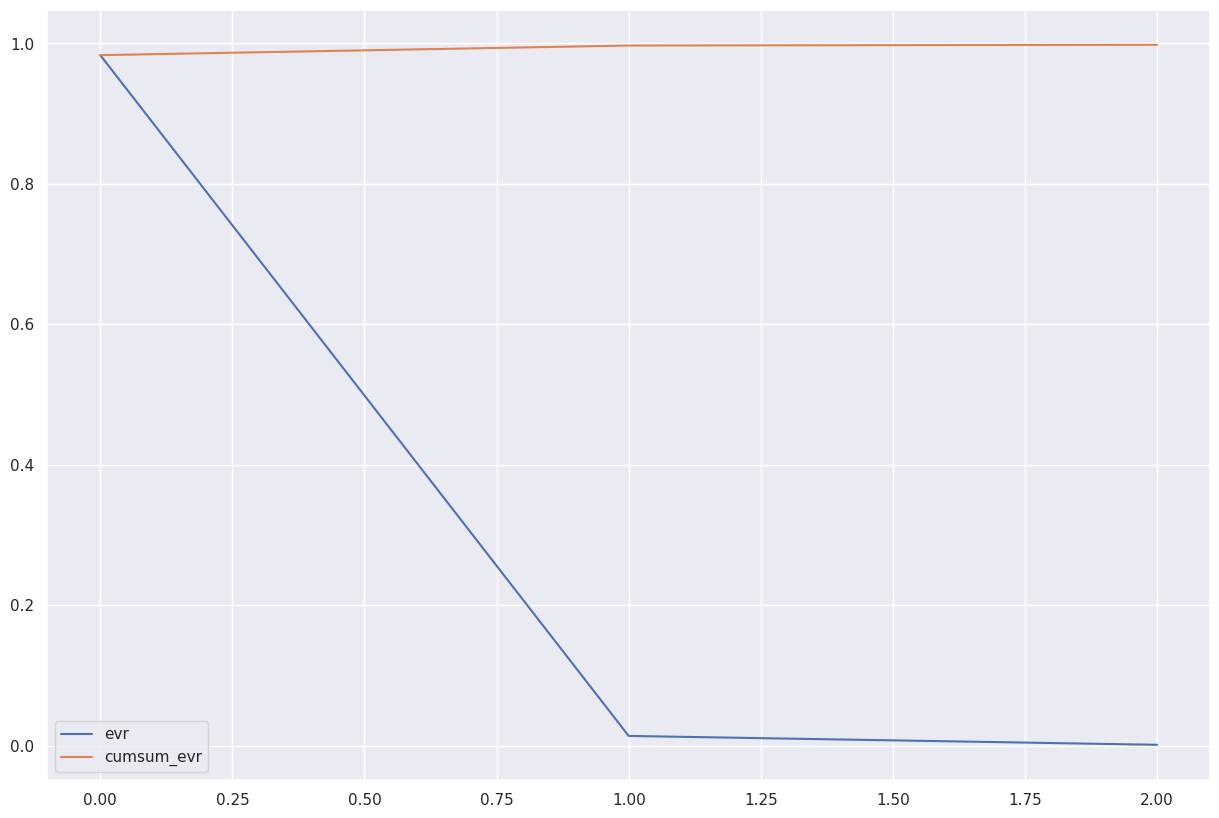

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
print(model.explained_variance_ratio_)

[0.9831853  0.01367817 0.00103412]


In [ ]:
def myplot_df(df,coeff, scale, labels = None):
    df["xs"] = df[df.columns[0]]
    df["ys"] = df[df.columns[1]]
    #print(df)

    n = coeff.shape[0]


    if scale == True:
        scalex = 1.0/(df["xs"].max() - df["xs"].min())
        scaley = 1.0/(df["ys"].max() - df["ys"].min())

        df["xs"] = scalex *  df["xs"]
        df["ys"] = scaley * df["ys"]

    g = sns.scatterplot(x='xs',y='ys', data=df)
    g.legend(title = "PCA", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data.columns[i], color = 'g', ha = 'center', va = 'center', alpha = 0.5)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

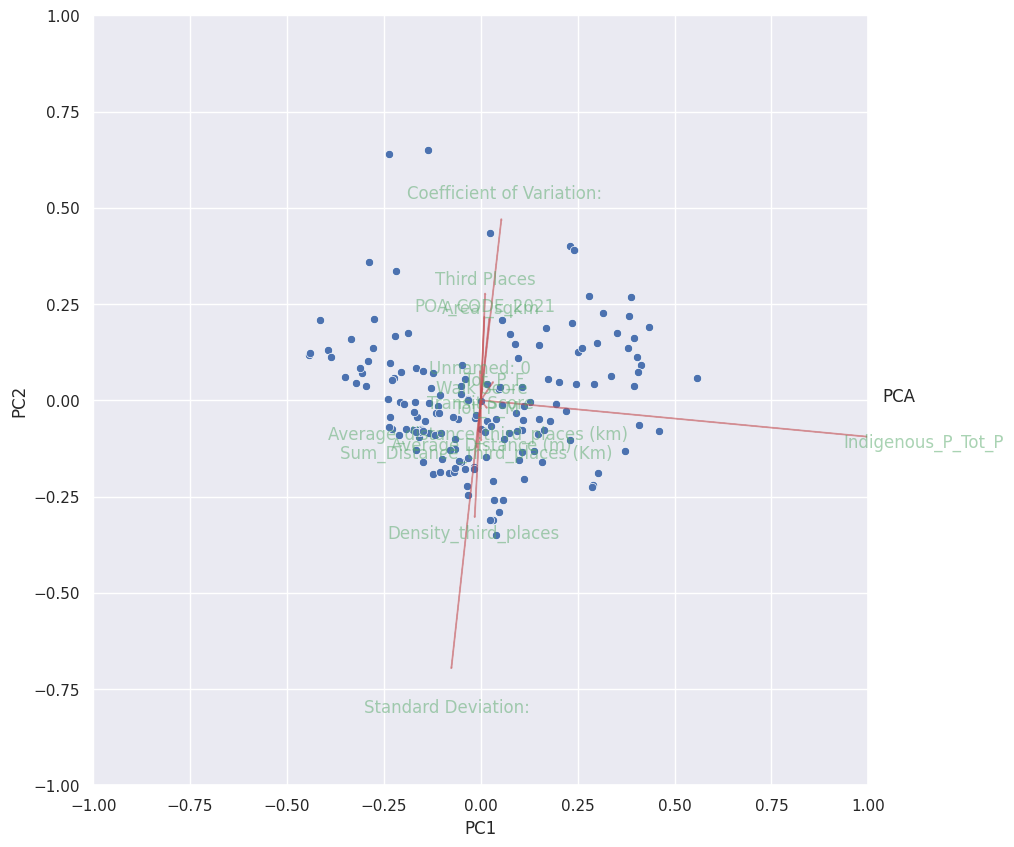

In [ ]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
fig = plt.gcf()
fig.set_size_inches(10, 10)
myplot_df(data_num_reduced_df, np.transpose(model.components_[0:2, :]), True)

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=pd.DataFrame(x).columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

<Axes: >

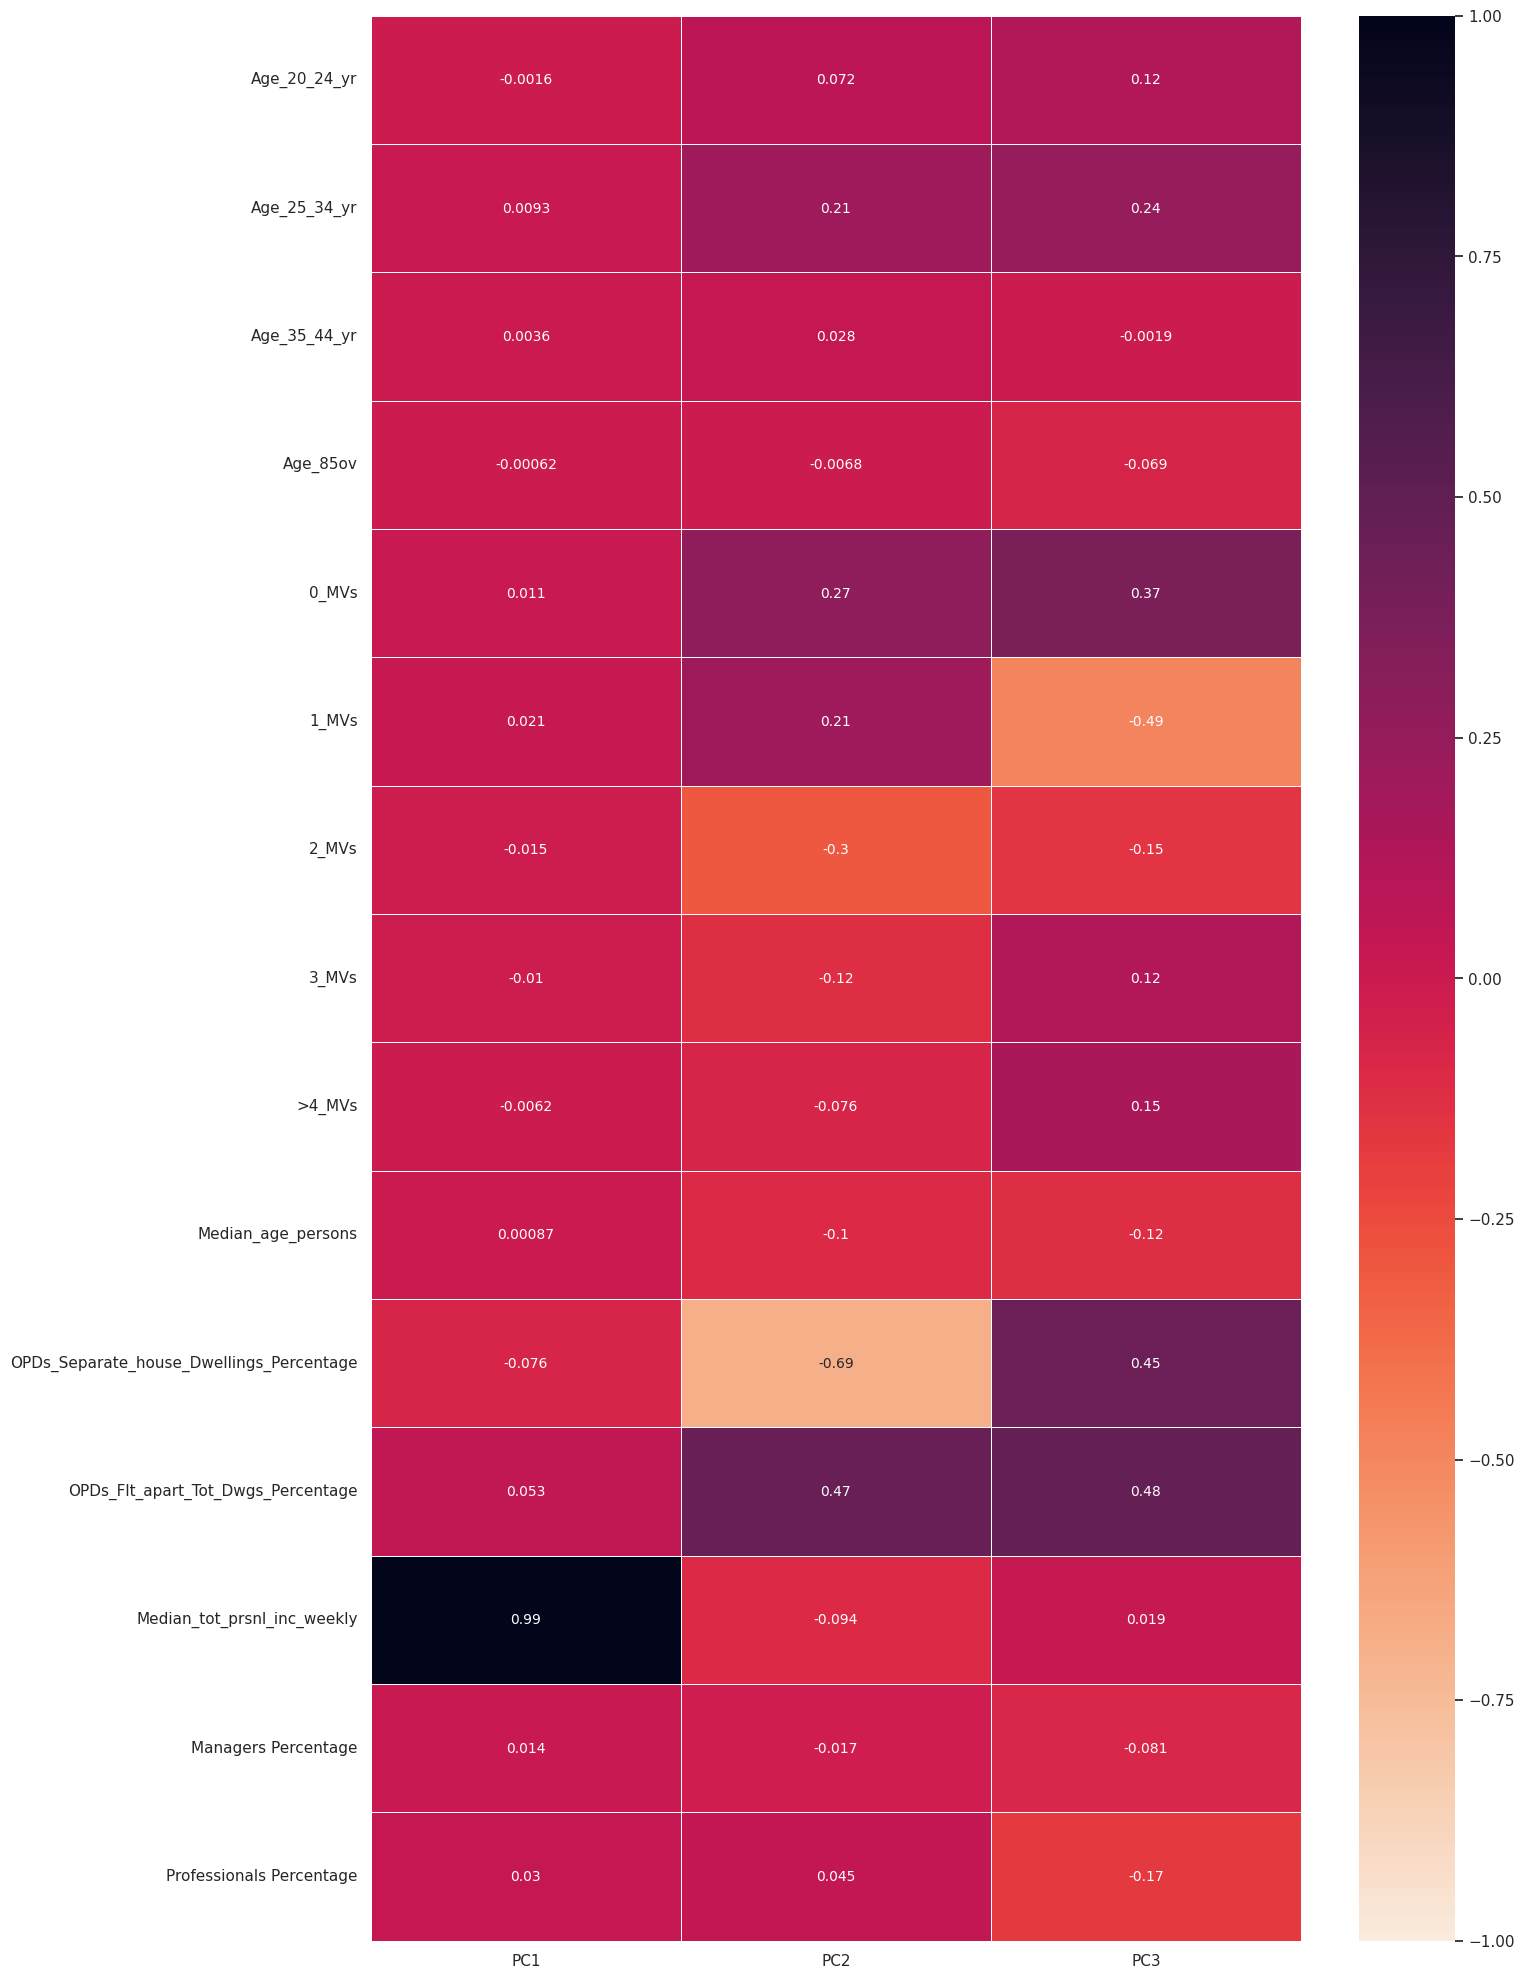

In [ ]:
fig, ax = plt.subplots(figsize=(15, 25))
# ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5,
#                  cmap="mako", vmin=-1, vmax=1, annot=True)

annot_props = {'size': 10}  # Change the size as per your preference

sns.heatmap(loadings.transpose(), center=0, linewidths=0.5,
            cmap="rocket_r", vmin=-1, vmax=1, annot=True, annot_kws=annot_props, ax=ax)


In [ ]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = pd.DataFrame(x).columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

     0                                         1
0  PC0               Median_tot_prsnl_inc_weekly
1  PC1  OPDs_Separate_house_Dwellings_Percentage
2  PC2                                     1_MVs


#AUGMENT DATASET

In [ ]:
def augment_dataset(data, cycles):
    augmented_data = pd.DataFrame(columns=data.columns)

    for k in range(cycles):
        for j in range(len(data)):
            f = random.uniform(1.01, 1.1)

            row = data.iloc[j]
            new_row=row*f

            augmented_data = augmented_data.append(new_row, ignore_index=True)

    return pd.concat([data, augmented_data], ignore_index=True)

In [ ]:
data_numerical

,Walk Score,Transit Score,Third Places,Area _sqkm,Density_third_places,Sum_Distance_third_places (Km),Average_distance_third_places (km),Average Distance (m),Standard Deviation:,Coefficient of Variation:,Indigenous_P_Tot_P,Tot_P_M,Tot_P_F,Tot_P_P,age_0_4,Age_5_14_yr,Age_15_19_yr,Age_20_24_yr,Age_25_34_yr,Age_35_44_yr,Age_45_54_yr,Age_55_64_yr,Age_65_74_yr,Age_75_84_yr,Age_85ov,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Married Percentage,Separated Percentage,Divorced Percentage,Widowed Percentage,Never_married Percentage,Tot_Indig_status_ns_P,Indigenous Population Percentage_y,Buddhism Percentage,Christianity_Tot Percentage,Hinduism Percentage,Islam Percentage,Judaism Percentage,Othr_Rel_Sikhism Percentage,Othr_Rel_Aust_Abor_Trad_Rel Percentage,Arthritis Percentage,Asthma Percentage,Cancer Percentage,Dementia Percentage,Diabetes Percentage,Heart_disease Percentage,Kidney_disease Percentage,Lung_cond Percentage,Mental_health_cond Percentage,Stroke Percentage,Other Percentage,None Percentage,Couple Family Without Children,Couple Family With Children,One Parent Family,Other Family,Total_dwelings,0_MVs,1_MVs,2_MVs,3_MVs,>4_MVs,Total_PDs_Dwellings,OPDs_Separate_house_Dwellings_Percentage,OPDs_SD_r_t_h_th_Tot_Dwgs_Percentage,OPDs_Flt_apart_Tot_Dwgs_Percentage,OPDs_Oth_dwg_Cvn_Ds_Percentage,OPDs_Oth_dwg_cab_hboat_Ds_Percentage,OPDs_Ot_dwg_Hs_f_att_sh_of_Ds_Percentage,OPDs_Other_dwelling_Tot_Dwgs_Percentage,Percent_Unem_loyment_P,Percnt_LabForc_prticipation_P,Percnt_Employment_to_populn_P,Managers Percentage,Professionals Percentage,TechnicTrades_W Percentage,CommunPersnlSvc_W Percentage,ClericalAdminis_W Percentage,Sales_W Percentage,Mach_oper_drivers Percentage,Labourers Percentage,Occu_ID_NS Percentage,Did_not_work,Worked_home,3_methods_to_reach_work,2_methods_to_reach_work,1_methods_to_reach_work,Other_Educational_Institution_y,Total_Tertiary_y,Tertiary_University_y,Tertiary_Vocational_y,Secondary_y,Primary_y,Grade_12Complete_y,Grade_10Complete_y,DidNotGoToSchool_y,avg_dist/area(km),loneliness
0,100,100,763,2.4814,307.487709,354934.491900,0.723323,517,260,0.502,158,21548,21539,43084,1.62,1.78,4.01,25.13,41.00,13.72,5.72,3.92,2.22,0.75,0.17,28,1733,768,370,1857,1.1,1306,1.7,18.76,1.72,4.42,0.69,74.42,3825,8.878006,10.54,19.78,7.47,2.63,0.17,0.43,0.00,1.54,4.68,0.72,0.08,1.23,0.72,0.25,0.24,6.37,0.21,4.26,74.34,69.15,13.10,7.65,10.12,21750,70.22,24.76,2.43,0.24,0.20,32013,0.02,0.15,67.34,0.00,0.00,0.03,0.03,9.6,68.8,62.2,8.88,31.61,6.84,19.85,12.62,9.75,1.12,7.44,1.88,13.57,31.82,1.21,4.62,48.34,8.57,66.01,49.61,16.34,2.10,2.26,81.91,81.91,0.77,0.291498,22.459722
1,88,100,33,1.8557,17.783047,697.393232,0.660410,495,140,0.283,12,2353,2545,4896,2.25,3.59,1.88,5.62,23.37,16.05,11.27,13.54,13.30,6.62,2.43,42,2383,1532,480,3733,0.9,2345,1.8,35.97,2.56,8.90,3.75,49.01,260,5.310458,1.49,36.32,0.76,0.98,0.61,0.06,0.00,7.70,7.68,3.92,1.06,2.35,3.62,0.84,0.88,9.35,0.82,8.62,59.66,71.56,19.35,7.01,2.67,2396,18.86,52.71,22.50,2.96,1.84,3255,2.37,16.53,54.13,0.00,0.00,0.09,0.09,3.2,69.0,66.8,18.20,48.03,2.23,7.82,15.64,4.47,0.59,1.45,1.77,9.58,48.77,0.23,1.14,39.93,4.24,44.92,37.61,7.01,9.77,11.06,81.87,81.87,0.20,0.355882,37.989438
2,64,96,48,4.0421,11.875015,2291.821337,1.157486,820,532,0.649,45,5655,5827,11482,3.15,3.90,1.79,6.19,29.29,18.77,10.66,9.33,9.08,5.74,2.11,37,2000,1343,451,2727,1.0,2090,1.7,34.02,2.53,9.54,3.30,50.63,1020,8.883470,3.27,32.53,3.93,2.01,2.15,0.26,0.00,4.87,6.75,2.76,0.36,2.45,2.81,0.39,0.81,7.30,0.47,7.23,63.58,66.21,20.54,9.91,3.23,5728,20.57,61.68,14.58,1.62,0.47,7641,0.08,0.09,74.52,0.00,0.00,0.00,0.00,4.8,68.3,65.0,15.98,43.43,3.20,9.13,16.46,6.85,0.57,2.78,1.53,9.44,43.18,0.92,2.41,43.59,5.19,38.46,27.38,11.01,7.14,9.63,78.36,78.36,0.38,0.286357,43.796499
3,97,100,66,1.8542,35.594866,2744.112058,0.659642,471,238,0.507,97,11499,11197,22699,3.09,2.89,2.02,12.6

In [ ]:
data_numerical_augmented=augment_dataset(data_numerical,5)

<ipython-input-58-905058b68072>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(new_row, ignore_index=True)


In [ ]:
data_numerical_augmented = data_numerical_augmented.sample(frac=1, random_state=25)

# Reset the index
data_numerical_augmented = data_numerical_augmented.reset_index(drop=True)

# DECLARE FEATURES - *from PCA*


In [ ]:
#declare features
selected_col=[ 'Walk Score','Transit Score','Area _sqkm','1_MVs','OPDs_Separate_house_Dwellings_Percentage','Median_tot_prsnl_inc_weekly']
x=data_numerical_augmented[selected_col]
#Tot_P_P','OPDs_Flt_apart_Tot_Dwgs_Percentage',

#print(x.head())
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Walk Score                                966 non-null    float64
 1   Transit Score                             966 non-null    float64
 2   Area _sqkm                                966 non-null    float64
 3   1_MVs                                     966 non-null    float64
 4   OPDs_Separate_house_Dwellings_Percentage  966 non-null    float64
 5   Median_tot_prsnl_inc_weekly               966 non-null    float64
dtypes: float64(6)
memory usage: 45.4 KB
None


## NORMALIZE FEATURES

In [ ]:
# Load and instantiate a StandardSclaer
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(x)

print(X_scaled.shape)

(966, 6)


In [ ]:
print(pd.DataFrame(X_scaled).describe())

                  0             1             2             3             4  \
count  9.660000e+02  9.660000e+02  9.660000e+02  9.660000e+02  9.660000e+02   
mean   3.222635e-16  2.206654e-17 -2.758318e-17 -3.443300e-16  1.130910e-16   
std    1.000518e+00  1.000518e+00  1.000518e+00  1.000518e+00  1.000518e+00   
min   -2.790487e+00 -2.205941e+00 -1.089667e+00 -2.874321e+00 -2.125317e+00   
25%   -7.290332e-01 -7.261328e-01 -6.454834e-01 -5.967732e-01 -5.164127e-01   
50%    8.151998e-02 -1.782189e-01 -2.665628e-01  9.262589e-03  1.551927e-01   
75%    8.032521e-01  6.088936e-01  2.916430e-01  6.587061e-01  8.105094e-01   
max    1.827005e+00  2.866239e+00  5.863697e+00  2.741040e+00  1.671861e+00   

                  5  
count  9.660000e+02  
mean  -3.015761e-16  
std    1.000518e+00  
min   -2.150722e+00  
25%   -7.370544e-01  
50%   -1.134772e-01  
75%    6.296699e-01  
max    2.842360e+00  


# TARGETS  - *planning advice*




In [ ]:
#Declare targets to be predicted
selected_col_2=['Density_third_places', 'avg_dist/area(km)']
# , 'avg_dist/area(km)' 'Coefficient of Variation:'
y=data_numerical_augmented[selected_col_2]
print(y.info())
#print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Density_third_places  966 non-null    float64
 1   avg_dist/area(km)     966 non-null    float64
dtypes: float64(2)
memory usage: 15.2 KB
None


## NORMALIZE TARGETS

In [ ]:
# Scaler for Y features
scalerY = StandardScaler()

# Apply the scaler to our Y-features
Y_scaled = scalerY.fit_transform(y)

print(Y_scaled.shape)

(966, 2)


*our X_scaled and Y_scaled (should) have the same shape*



#PREPARE DATA

**SPLIT INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.2, random_state = 21)

In [ ]:
# Define the noise parameters
mean = 0  # Mean of the noise
std_dev = 0.1  # Standard deviation of the noise

# Generate random noise
noise = np.random.normal(mean, std_dev, size=X_train.shape)

# Add noise to the dataset
noisy_dataset = X_train + noise

noisy_dataset.shape


(772, 6)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
# print(X_test)
# print(y_test)

TRAIN input (772, 6) output (772, 2)
TEST input (194, 6) output (194, 2)


#BUILD MODEL

In [ ]:
# Instantiate a sequential model
tf.random.set_seed(3)
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]

# MODEL ARCHITECTURE
model.add(tf.keras.layers.Dense(6, input_shape=(n_cols,), activation='relu')) # INPUT LAYER (with 6 neurons)

# model.add(tf.keras.layers.Dense(8, activation='relu'))
# model.add(tf.keras.layers.Dense(24, activation='relu'))
# model.add(tf.keras.layers.Dense(12, activation='relu'))

# model.add(tf.keras.layers.Dense(10, activation='relu'))
# model.add(tf.keras.layers.Dense(12, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='relu'))

# model.add(tf.keras.layers.Dense(11, activation='relu'))
# model.add(tf.keras.layers.Dense(9, activation='relu'))
# model.add(tf.keras.layers.Dense(5, activation='relu'))

# model.add(tf.keras.layers.Dense(6, activation='relu'))

# model.add(tf.keras.layers.Dense(12, activation='relu'))

model.add(tf.keras.layers.Dense(3, activation='relu'))

model.add(tf.keras.layers.Dense(2, activation= "sigmoid")) # OUTPUT LAYER (with 6 neurons)


# Compile your model
model.compile(optimizer = "adam", loss = "mean_squared_error",metrics="accuracy")


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


#TRAIN MODEL

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
#batch_size=50
history = model.fit(X_train,y_train,epochs=500,batch_size=15,validation_split=0.2)

Epoch 1/500
42/42 [==============================] - 2s 10ms/step - loss: 1.0499 - accuracy: 0.5656 - val_loss: 1.3682 - val_accuracy: 0.5806
Epoch 2/500
42/42 [==============================] - 0s 3ms/step - loss: 1.0107 - accuracy: 0.5721 - val_loss: 1.3328 - val_accuracy: 0.5806
Epoch 3/500
42/42 [==============================] - 0s 3ms/step - loss: 0.9743 - accuracy: 0.5689 - val_loss: 1.3011 - val_accuracy: 0.5742
Epoch 4/500
42/42 [==============================] - 0s 3ms/step - loss: 0.9413 - accuracy: 0.5543 - val_loss: 1.2732 - val_accuracy: 0.5613
Epoch 5/500
42/42 [==============================] - 0s 4ms/step - loss: 0.9141 - accuracy: 0.5559 - val_loss: 1.2484 - val_accuracy: 0.5742
Epoch 6/500
42/42 [==============================] - 0s 3ms/step - loss: 0.8919 - accuracy: 0.5656 - val_loss: 1.2298 - val_accuracy: 0.5935
Epoch 7/500
42/42 [==============================] - 0s 4ms/step - loss: 0.8750 - accuracy: 0.5705 - val_loss: 1.2144 - val_accuracy: 0.6129
Epoch 8/500


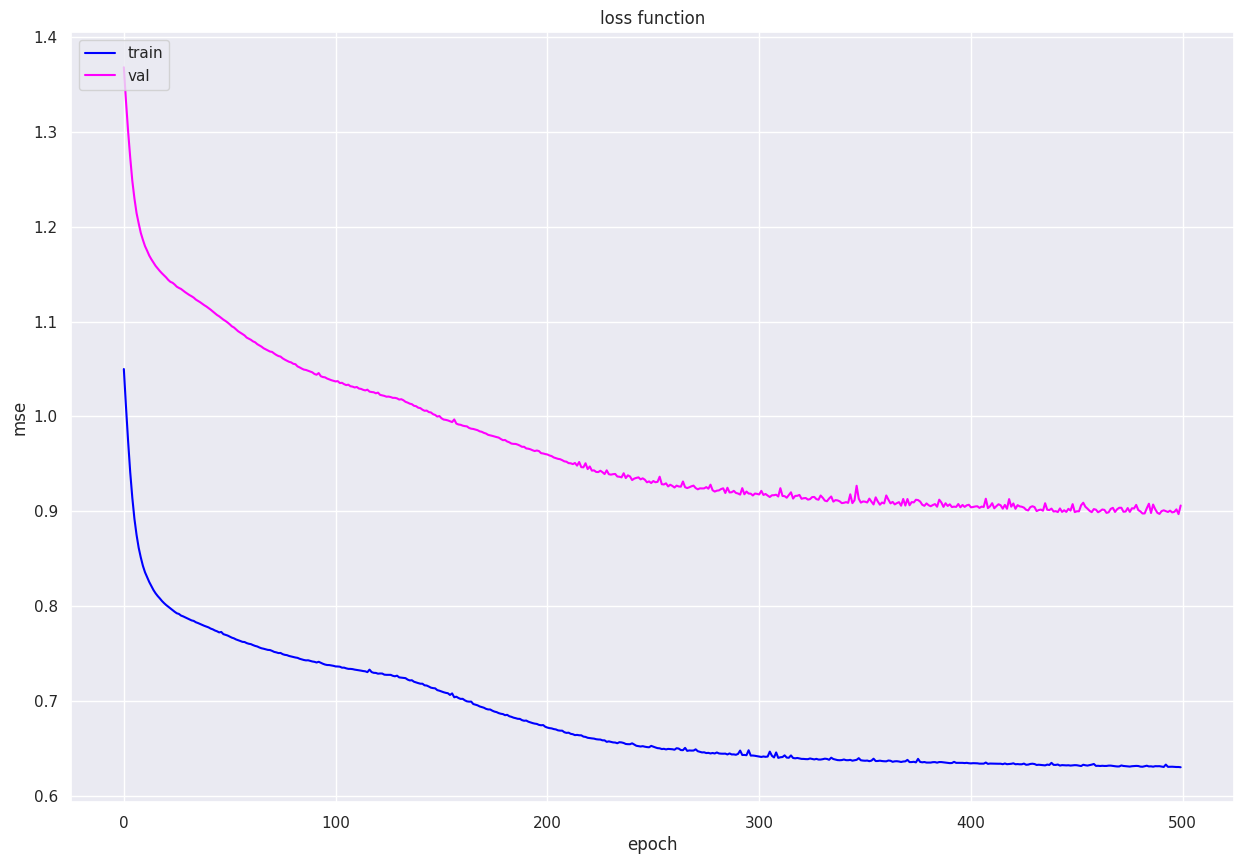

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='magenta')
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#EVALUATE MODEL



In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.8557 - accuracy: 0.6546
mse_test: [0.8556744456291199, 0.6546391844749451]


In [ ]:
#model.predict(X_test)
type(X_test)
X_test[1]
X_test

array([[-0.38529   , -0.59815359, -0.04747089,  1.57770184, -1.93119636,
         1.9336742 ],
       [-1.62859664, -1.26274364, -0.53540101, -0.54450932, -0.25940075,
        -0.18037885],
       [ 0.36851527,  1.16457449, -0.87704945,  1.36046027, -1.54149434,
         1.03726696],
       ...,
       [ 0.9487989 , -0.47389148,  0.6021151 , -0.42406832,  0.24853219,
        -0.5260639 ],
       [-0.10340674, -0.89925358,  0.56222853,  0.66930242,  0.00599749,
        -0.47572802],
       [ 0.1280819 ,  0.03193574, -0.2789727 ,  0.79447615, -0.53971794,
         0.41921756]])

seems like we have a very small dataset for the model to learn from... considering augmenting the dataset

#FIX LONELY POSTCODES

In [ ]:
postcodes_lonely

,Unnamed: 0,POA_CODE_2021,Walk Score,Transit Score,Third Places,Area _sqkm,Density_third_places,Sum_Distance_third_places (Km),Average_distance_third_places (km),Average Distance (m),Standard Deviation:,Coefficient of Variation:,Indigenous_P_Tot_P,Tot_P_M,Tot_P_F,Tot_P_P,age_0_4,Age_5_14_yr,Age_15_19_yr,Age_20_24_yr,Age_25_34_yr,Age_35_44_yr,Age_45_54_yr,Age_55_64_yr,Age_65_74_yr,Age_75_84_yr,Age_85ov,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Married Percentage,Separated Percentage,Divorced Percentage,Widowed Percentage,Never_married Percentage,Tot_Indig_status_ns_P,Indigenous Population Percentage_y,Buddhism Percentage,Christianity_Tot Percentage,Hinduism Percentage,Islam Percentage,Judaism Percentage,Othr_Rel_Sikhism Percentage,Othr_Rel_Aust_Abor_Trad_Rel Percentage,Arthritis Percentage,Asthma Percentage,Cancer Percentage,Dementia Percentage,Diabetes Percentage,Heart_disease Percentage,Kidney_disease Percentage,Lung_cond Percentage,Mental_health_cond Percentage,Stroke Percentage,Other Percentage,None Percentage,Couple Family Without Children,Couple Family With Children,One Parent Family,Other Family,Total_dwelings,0_MVs,1_MVs,2_MVs,3_MVs,>4_MVs,Total_PDs_Dwellings,OPDs_Separate_house_Dwellings_Percentage,OPDs_SD_r_t_h_th_Tot_Dwgs_Percentage,OPDs_Flt_apart_Tot_Dwgs_Percentage,OPDs_Oth_dwg_Cvn_Ds_Percentage,OPDs_Oth_dwg_cab_hboat_Ds_Percentage,OPDs_Ot_dwg_Hs_f_att_sh_of_Ds_Percentage,OPDs_Other_dwelling_Tot_Dwgs_Percentage,Percent_Unem_loyment_P,Percnt_LabForc_prticipation_P,Percnt_Employment_to_populn_P,Managers Percentage,Professionals Percentage,TechnicTrades_W Percentage,CommunPersnlSvc_W Percentage,ClericalAdminis_W Percentage,Sales_W Percentage,Mach_oper_drivers Percentage,Labourers Percentage,Occu_ID_NS Percentage,Did_not_work,Worked_home,3_methods_to_reach_work,2_methods_to_reach_work,1_methods_to_reach_work,Other_Educational_Institution_y,Total_Tertiary_y,Tertiary_University_y,Tertiary_Vocational_y,Secondary_y,Primary_y,Grade_12Complete_y,Grade_10Complete_y,DidNotGoToSchool_y,avg_dist/area(km),loneliness
0,3003,POA3003,16,53,8,6.5822,1.215399,28.100876,0.501801,344,100,0.293,69,4093,3926,8025,3.12,4.19,2.83,13.68,40.47,17.16,8.69,5.42,3.05,1.13,0.19,31,2106,1058,388,2406,1.1,1788,1.9,26.57,2.47,5.43,0.87,64.56,372,4.635514,5.16,22.28,5.84,2.98,0.30,0.25,0.00,2.21,6.55,1.13,0.09,1.56,1.31,0.45,0.35,8.46,0.22,6.09,70.01,64.34,23.43,8.39,3.90,3853,35.89,50.43,10.41,1.43,0.49,4968,0.93,14.45,61.71,0.0,0.00,0.42,0.42,6.3,75.5,70.7,13.06,38.32,5.49,13.46,14.09,7.02,0.99,5.68,1.54,11.44,38.41,0.91,3.34,45.50,7.90,55.34,40.45,14.68,6.96,7.51,82.32,82.32,0.52,0.076236,59.273202
1,3022,POA3022,22,47,1,2.1307,0.469329,0.000000,0.000000,0,0,0.000,20,1600,1567,3170,7.00,10.16,3.88,4.92,19.09,17.22,12.56,8.71,8.11,4.73,3.38,37,1700,698,340,1734,0.8,1452,2.4,39.28,4.42,9.26,8.04,38.90,279,8.801262,6.72,42.37,3.66,6.40,0.13,1.36,0.13,7.85,6.97,1.80,2.11,4.89,3.03,0.76,1.48,9.02,1.04,9.24,58.86,33.16,41.04,22.46,3.74,1143,8.66,42.78,31.15,10.06,4.99,1238,70.76,18.50,0.57,0.0,2.34,0.00,2.34,9.3,56.9,51.6,7.68,27.21,3.34,17.70,19.87,8.35,4.84,8.51,2.00,9.30,21.92,0.59,2.88,64.65,3.01,21.62,13.31,8.11,13.93,22.77,55.46,55.46,5.18,0.000000,55.284589
2,3023,POA3023,45,0,31,39.5156,0.784500,2802.091123,3.013001,2476,463,0.187,542,34082,33065,67146,5.98,15.28,6.97,6.54,14.26,16.82,14.26,9.44,6.67,2.93,0.86,35,1869,719,381,2017,0.9,1905,3.2,50.31,3.39,6.90,3.64,35.76,2670,3.976410,8.36,47.72,4.29,8.26,0.03,2.18,0.00,5.10,7.09,1.57,0.38,5.47,2.43,0.84,0.81,5.24,0.73,6.63,64.75,24.21,57.03,17.14,1.66,19696,3.69,28.81,42.34,15.48,8.20,20753,83.99,9.13,1.70,0.0,0.00,0.02,0.02,7.0,60.4,56.1,8.37,22.95,4.18,17.65,20.41,11.64,3.61,8.76,2.43,11.08,20.66,0.58,2.17,65.07,3.81,18.65,12.76,5.88,22.06,27.36,62.32,62.32,2.71,0.076248,55.848010
3,3024,POA3024,1,0,9,143.8812,0.062552,110.891634,1.540162

In [ ]:
postcode_to_pred=postcodes_lonely.iloc[5]

In [ ]:
selected_col=[ 'Walk Score','Transit Score','Area _sqkm','1_MVs','OPDs_Separate_house_Dwellings_Percentage','Median_tot_prsnl_inc_weekly']
postcode_to_pred=[postcode_to_pred[selected_col]]

In [ ]:
postcode_to_pred=scalerX.fit_transform(postcode_to_pred)
predictions=model.predict(postcode_to_pred)
predictions=scalerY.inverse_transform(predictions)

1/1 [==============================] - 0s 37ms/step


In [ ]:
print('third place density should be  ' + str(predictions[0][0]) + '  places/km')
print('third place distribution should be  ' + str(predictions[0][1]) + '  places/km2')

third place density should be  8.439972  places/km
third place distribution should be  0.19119318  places/km2


# SAVE MODEL

In [ ]:
#https://www.tensorflow.org/guide/keras/serialization_and_saving

model.save('predict_loneliness.h5')

scalerX_filename='predict_loneliness_scalerX.save'
joblib.dump(scalerX,scalerX_filename)

scalerY_filename='predict_loneliness_scalerY.save'
joblib.dump(scalerY,scalerY_filename)

['predict_meanders_scalerY.save']